## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
#Normalization
from sklearn.preprocessing import MinMaxScaler

#Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Importing the data

In [2]:
df= pd.read_csv("C:/Users/Muhammad Abdullahi/Downloads/Pune1.csv")

In [3]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: total: 0 ns
Wall time: 0 ns


In [4]:
df.head()

,location,area,price,price_currency,status,new/resale,price_negotiable,description,facing,furnished,...,Intercom,Indoor Games,Maintenance Staff,Multipurpose Room,ATM,Cafeteria,Staff Quarter,Hospital,School,Shopping Mall
0,Lohegaon,1780,6500000,INR,0.0,0,0,A spacious 4 bhk villa is available for sale i...,east,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mohammed wadi,2225,17500000,INR,1.0,0,0,Well designed 6 bhk villa is available at a pr...,unknown,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lohegaon,1785,6500000,INR,0.0,0,0,"It’s a 4 bhk villa situated in Lohegaon, Pune....",east,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Valvan Lonavla,1200,15000000,INR,0.0,0,0,A spacious 3 bhk villa is available for sale i...,west,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ganeshkhind,4000,35000000,INR,0.0,0,0,This spacious 4 bhk villa is available for sal...,unknown,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Encode Categorical Features

In [9]:
df_dummies = pd.get_dummies(df["facing"])
df = pd.concat([df,df_dummies], axis = 1)

df = df.drop(["facing"], axis = 1)

In [10]:
#let's verify the columns
df.columns

Index(['location', 'area', 'price', 'price_currency', 'status', 'new/resale',
       'price_negotiable', 'description', 'furnished', 'age of property',
       'Lift(s)', 'Full Power Backup', '24 X 7 Security',
       'Children's play area', 'Club House', 'Gymnasium', 'Swimming Pool',
       'Sports Facility', 'Jogging Track', 'Landscaped Gardens',
       'locality_score', 'project_score', 'builder_experience',
       'Rain Water Harvesting', 'Car Parking', 'Vaastu Compliant',
       'Golf Course', 'Intercom', 'Indoor Games', 'Maintenance Staff',
       'Multipurpose Room', 'ATM', 'Cafeteria', 'Staff Quarter', 'Hospital',
       'School', 'Shopping Mall', 'east', 'north', 'northeast', 'northwest',
       'south', 'southeast', 'southwest', 'unknown', 'west'],
      dtype='object')

## Feature Selection with Correlation

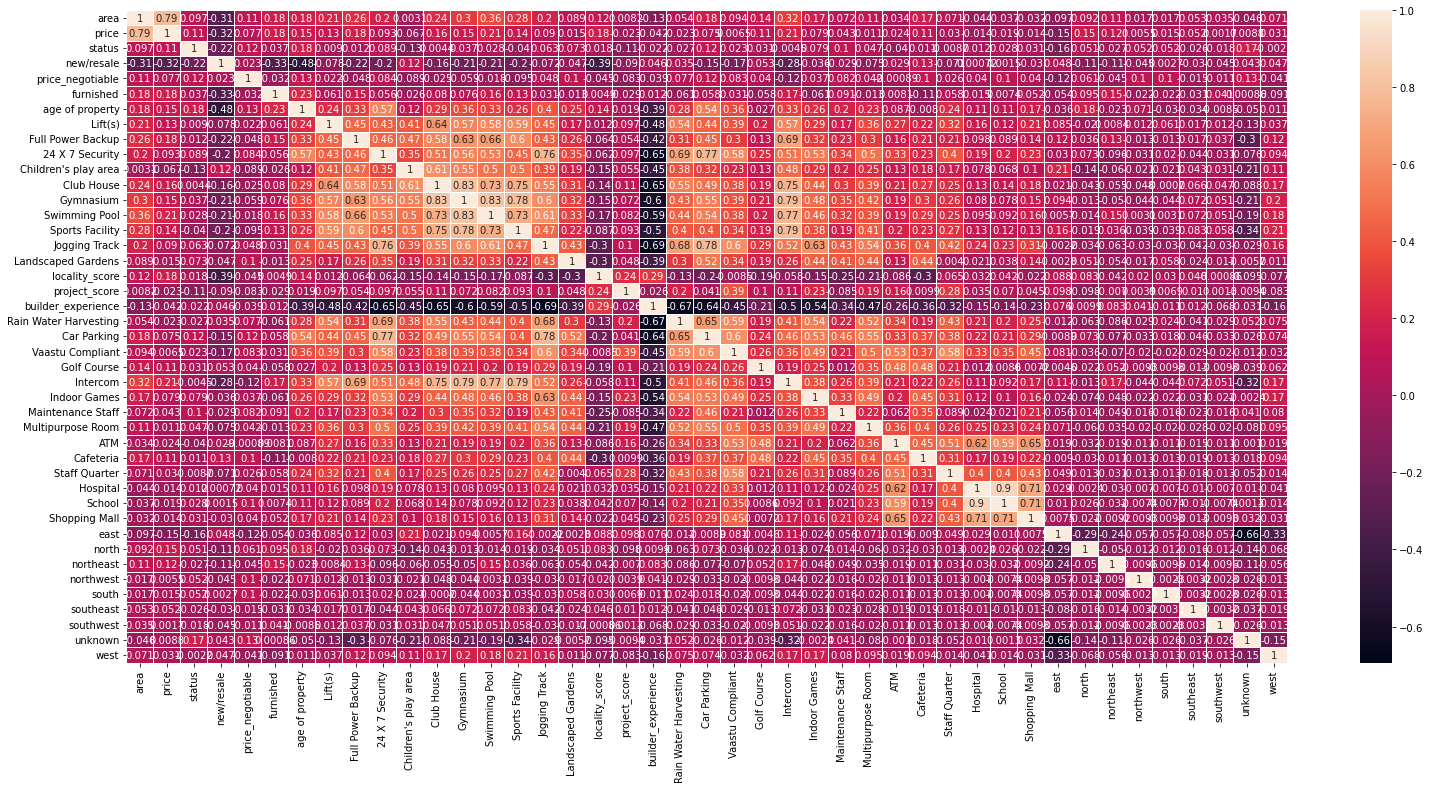

In [11]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(26,12))
sns.heatmap(df_corr, linewidths=.5, annot=True, ax = ax)
plt.show()

In [12]:
corr_index = df_corr['price'].abs().sort_values(ascending = False)[0:9].index

In [13]:
df_high_corr = df[corr_index]
df_high_corr.head()

,price,area,new/resale,Swimming Pool,Intercom,Full Power Backup,locality_score,furnished,Club House
0,6500000,1780,0,0,0.0,0,8.000000,0,0
1,17500000,2225,0,0,0.0,0,8.015749,1,0
2,6500000,1785,0,0,0.0,0,8.000000,0,0
3,15000000,1200,0,0,0.0,0,8.015749,1,0
4,35000000,4000,0,0,0.0,0,8.015749,1,0


## Data Normalization

In [14]:
X = df_high_corr.drop(['price'], axis = 1)
y = df_high_corr['price']

print(X.shape, y.shape)

(887, 8) (887,)


In [15]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X,y)

## Model Selection and Train

### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(709, 8) (178, 8) (709,) (178,)


### Train Models

In [17]:
models = {
    "Linear Regression":LinearRegression(), 
    "Ridge Regressor":Ridge(), 
    "Lasso Regressor":Lasso(),
    "Elastic Net":ElasticNet(), 
    "SVR Regressor":SVR(), 
    "Random Forest Regressor":RandomForestRegressor()
}

In [18]:
param_grids = [
    {'n_jobs': [2, 5, 7, 10], 'fit_intercept': [True, False]},
    {'alpha': [1.0, 0.75, 0.5, 0.25], 'solver': ('auto', 'svd', 'cholesky')},
    {'alpha': [1.0, 0.75, 0.5, 0.25], "tol": [0.0001, 0.0005, 0.001, 0.005, 0.01]},
    {'alpha': [1.0, 0.75, 0.5, 0.25]},
    {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [1, 100, 1000, 10000, 100000], 'epsilon': [0.1, 0.05, 0.2, 0.5]},
    {'n_estimators':[50,100,200,500], 'criterion':('squared_error', 'absolute_error', 'poisson'), 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,3]},
]

In [19]:
def train_grid_search(models, param_grids):
    best_params = []
    best_models = []
    best_mae = []
    best_mse = []
    best_r2 = []
    
    for idx, model_name in enumerate(models.keys()):
        t1 = time()
        print("Model Name: ", model_name)
        print("Model: ", models[model_name])
        cv = GridSearchCV(models[model_name], param_grids[idx], cv=5)
        cv.fit(X_train, y_train.values)
        
        model = cv.best_estimator_    
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test.values, y_pred)
        mse = mean_squared_error(y_test.values, y_pred)
        r2 = r2_score(y_test.values, y_pred)
        
        best_params.append(cv.best_params_)
        best_models.append(model)
        best_mae.append(mae)
        best_mse.append(mse)
        best_r2.append(r2)
        print("time:", time()-t1)
        print("----------------------------------")
    
    return {"model_names":models.keys(), "best_params":best_params, "best_models":best_models, "best_mae":best_mae, "best_mse":best_mse, "best_r2":best_r2}

In [20]:
results = train_grid_search(models, param_grids)
results

Model Name:  Linear Regression
Model:  LinearRegression()
time: 0.06979751586914062
----------------------------------
Model Name:  Ridge Regressor
Model:  Ridge()
time: 0.06893277168273926
----------------------------------
Model Name:  Lasso Regressor
Model:  Lasso()
time: 0.13597512245178223
----------------------------------
Model Name:  Elastic Net
Model:  ElasticNet()
time: 0.0336153507232666
----------------------------------
Model Name:  SVR Regressor
Model:  SVR()
time: 9.0574791431427
----------------------------------
Model Name:  Random Forest Regressor
Model:  RandomForestRegressor()
time: 473.1805684566498
----------------------------------


{'model_names': dict_keys(['Linear Regression', 'Ridge Regressor', 'Lasso Regressor', 'Elastic Net', 'SVR Regressor', 'Random Forest Regressor']),
 'best_params': [{'fit_intercept': False, 'n_jobs': 2},
  {'alpha': 0.75, 'solver': 'svd'},
  {'alpha': 1.0, 'tol': 0.0005},
  {'alpha': 0.25},
  {'C': 100000, 'epsilon': 0.05, 'kernel': 'poly'},
  {'criterion': 'absolute_error',
   'min_samples_leaf': 3,
   'min_samples_split': 2,
   'n_estimators': 200}],
 'best_models': [LinearRegression(fit_intercept=False, n_jobs=2),
  Ridge(alpha=0.75, solver='svd'),
  Lasso(tol=0.0005),
  ElasticNet(alpha=0.25),
  SVR(C=100000, epsilon=0.05, kernel='poly'),
  RandomForestRegressor(criterion='absolute_error', min_samples_leaf=3,
                        n_estimators=200)],
 'best_mae': [9328289.14595775,
  9116912.416584516,
  9378570.278411632,
  12647614.335683957,
  10808846.290776093,
  6445927.80363764],
 'best_mse': [188877176100455.22,
  179069950224783.88,
  191352106908285.62,
  308357927192494

### Evaluate Models and Model Comparison

In [21]:
print("For Best Model idx","\nmse:",np.argmin(results['best_mse']), "\nmae:", np.argmin(results['best_mae']), "\nR2:",np.argmax(results['best_r2']))

For Best Model idx 
mse: 5 
mae: 5 
R2: 5


In [22]:
models_summaries = pd.DataFrame(results)
models_summaries

,model_names,best_params,best_models,best_mae,best_mse,best_r2
0,Linear Regression,"{'fit_intercept': False, 'n_jobs': 2}","LinearRegression(fit_intercept=False, n_jobs=2)",9.328289e+06,1.888772e+14,0.547887
1,Ridge Regressor,"{'alpha': 0.75, 'solver': 'svd'}","Ridge(alpha=0.75, solver='svd')",9.116912e+06,1.790700e+14,0.571362
2,Lasso Regressor,"{'alpha': 1.0, 'tol': 0.0005}",Lasso(tol=0.0005),9.378570e+06,1.913521e+14,0.541962
3,Elastic Net,{'alpha': 0.25},ElasticNet(alpha=0.25),1.264761e+07,3.083579e+14,0.261887
4,SVR Regressor,"{'C': 100000, 'epsilon': 0.05, 'kernel': 'poly'}","SVR(C=100000, epsilon=0.05, kernel='poly')",1.080885e+07,3.793761e+14,0.091891
5,Random Forest Regressor,"{'criterion': 'absolute_error', 'min_samples_l...",(DecisionTreeRegressor(criterion='absolute_err...,6.445928e+06,1.193661e+14,0.714275


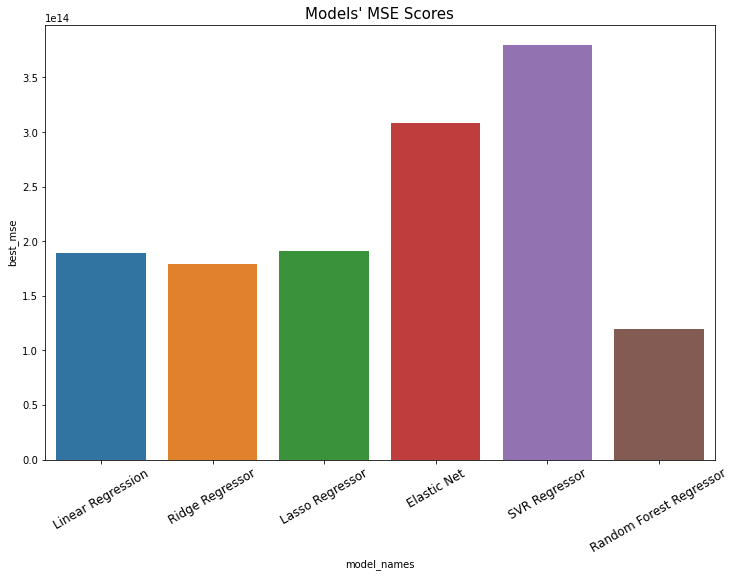

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x=models_summaries["model_names"], y=models_summaries["best_mse"])
plt.title("Models' MSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

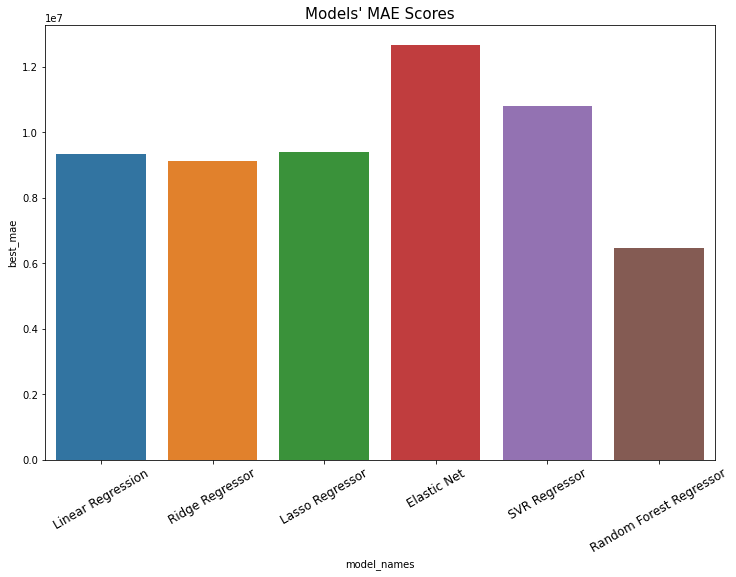

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x=models_summaries["model_names"], y=models_summaries["best_mae"])
plt.title("Models' MAE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

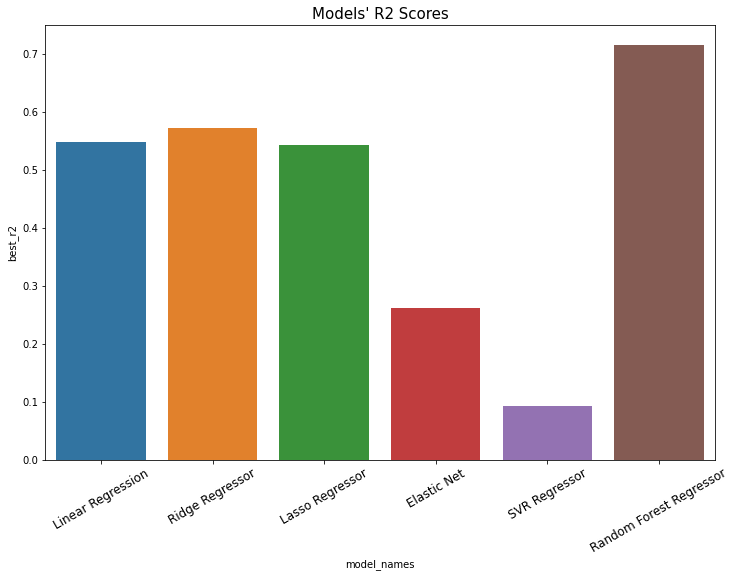

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x=models_summaries["model_names"], y=models_summaries["best_r2"])
plt.title("Models' R2 Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

### Model Tuning

In [26]:
print(models_summaries.iloc[5]["best_params"])

{'criterion': 'absolute_error', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
best_model = RandomForestRegressor(criterion = 'absolute_error',  min_samples_leaf = 3, min_samples_split = 10, n_estimators = 250)
cv_err = cross_val_score(best_model, X_train, y_train, cv=10)

In [28]:
print(cv_err.mean())

0.7136776161860051
